In [84]:
import matplotlib as mtp
import pandas as pd
import seaborn as sns
%matplotlib inline

mtp.rcParams['figure.figsize'] = [16,10]
# sns.set_theme(style="whitegrid")

df = pd.read_csv("current_options.csv")
df.head()

,option_state,option_owner,strike,amount,strikeAmount.mul(optionCollateralizationRatio).div(100).add(strikeFee),premium,expiration_date,optionType,market
0,2,0x3B2cba3423199f73924AD609fa8EeC504E1FaC1f,37232447572,1000000000000000000,1000000000000000000,69975000000000000,1604784056,2,eth_options
1,1,0xef764BAC8a438E7E498c2E5fcCf0f174c3E3F8dB,37232447572,50000000000000000000,50000000000000000000,3498750000000000000,1604784207,1,eth_options
2,1,0xef764BAC8a438E7E498c2E5fcCf0f174c3E3F8dB,37232447572,50000000000000000000,50000000000000000000,3498750000000000000,1604784217,2,eth_options
3,3,0x3DCa07E16B2Becd3eb76a9F9CE240B525451f887,37400000000,32000000000000000000,32000000000000000000,421638156312625250,1602451763,1,eth_options
4,3,0x45223f8E765457604A711062F158Bf093De8f636,37425000000,500000000000000000,500000000000000000,17482500000000000,1602970633,2,eth_options


In [85]:
def mapp_option_type(row):
    mapping = {1: "Put", 2:"Call"}
    return mapping[row]


def mapping_status(row):
    mapping = {0: "Inactive",
        1: "Active",
        2: "Exercised",
        3: "Expired"
    }
    return mapping[row]
df["option_state"] = df["option_state"].apply(mapping_status)
df["optionType"] = df["optionType"].apply(mapp_option_type)


In [86]:
eth = df[df.market == "eth_options"]

In [87]:

def cal_in_eth(val):
    return float(web3.Web3.fromWei(int(val), "ether"))

eth["amount"] = eth["amount"].apply(cal_in_eth)

results = eth[["optionType", "amount"]].groupby("optionType").sum()

print(results)

                amount
optionType            
Call        15412.2334
Put          6925.7218


/home/tom/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


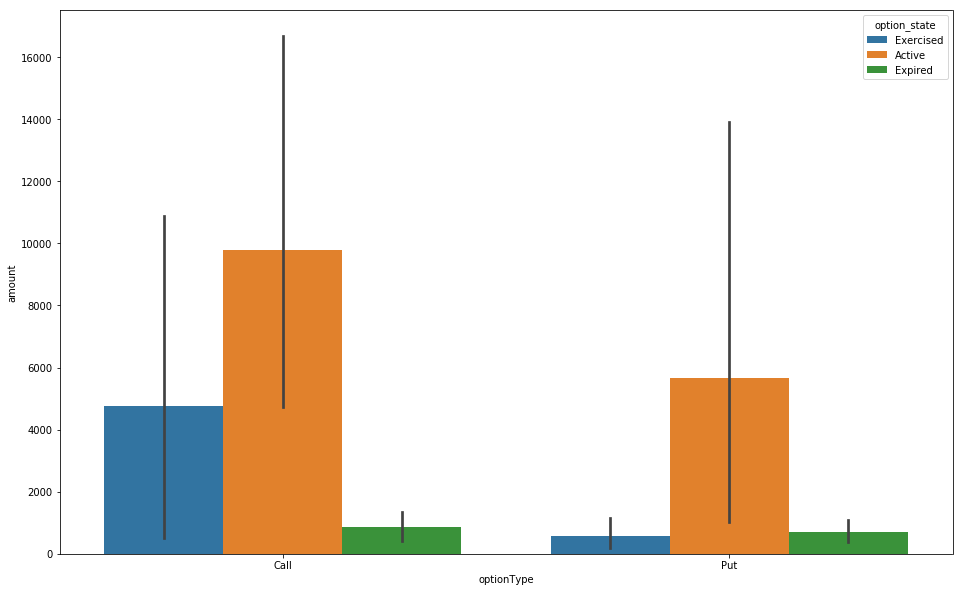

In [88]:

ax = sns.barplot(x="optionType", y="amount", data=eth, hue="option_state", estimator=sum)
